# 0.0 Central Limit Theorem
___

- According to the central limit theorem, the mean of a sample of data will be closer to the mean of the overall population in question, as the sample size increases, notwithstanding the actual distribution of the data. In other words, the data is accurate whether the distribution is normal or aberrant.

- As a general rule, sample sizes equal to or greater than 30 are deemed sufficient for the CLT to hold,3 meaning that the distribution of the sample means is fairly normally distributed. Therefore, the more samples one takes, the more the graphed results take the shape of a normal distribution. Note, however, that the central limit theory will still be approximated in many cases for much smaller sample sizes, such as n=8 or n=5.3

- The central limit theorem is often used in conjunction with the law of large numbers, which states that the average of the sample means and standard deviations will come closer to equaling the population mean and standard deviation as the sample size grows, which is extremely useful in accurately predicting the characteristics of populations.

<p align = 'center'>
    <img src = 'images/Sample_vs_Population.png'>
</p>



<p align = 'center'>
    <img src = 'images/Sample_vs_Population_table.png'>
</p>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# 1.0 Creating a sample DF with 4000 rows x 40 columns
___

-  As number of sample size increase , it will be observed that the sample mean tends towards the population mean.

In [45]:
np.random.seed(42)

df = pd.DataFrame(data = np.random.randint(0,100 , size = (2000,41)))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,51,92,14,71,60,20,82,86,74,74,...,58,41,91,59,79,14,61,61,46,61
1,50,54,63,2,50,6,20,72,38,17,...,1,5,53,3,53,92,62,17,89,43
2,33,73,61,99,13,94,47,14,71,77,...,7,87,62,10,80,7,34,34,32,4
3,40,27,6,72,71,11,33,32,47,22,...,89,41,76,50,62,95,51,95,3,93
4,22,14,42,28,35,12,31,70,58,85,...,76,2,69,71,26,8,61,36,96,50


In [46]:
mean = df.mean(axis = 1)
var = df.var(axis = 1)
std = df.std(axis = 1)

df['sample_mean'] = round(mean , 2)
df['sample_var'] = round(var , 2)
df['sample_std'] = round(std , 2)
df

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,sample_mean,sample_var,sample_std
0,51,92,14,71,60,20,82,86,74,74,...,59,79,14,61,61,46,61,53.34,810.13,28.46
1,50,54,63,2,50,6,20,72,38,17,...,3,53,92,62,17,89,43,43.41,919.05,30.32
2,33,73,61,99,13,94,47,14,71,77,...,10,80,7,34,34,32,4,50.22,918.73,30.31
3,40,27,6,72,71,11,33,32,47,22,...,50,62,95,51,95,3,93,50.46,1038.35,32.22
4,22,14,42,28,35,12,31,70,58,85,...,71,26,8,61,36,96,50,47.76,741.04,27.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,23,54,0,98,71,68,31,0,65,41,...,77,7,88,77,86,42,62,48.51,953.66,30.88
1996,80,11,83,97,55,48,51,10,26,61,...,14,24,34,54,62,46,66,42.90,766.84,27.69
1997,81,63,21,79,78,68,76,91,73,79,...,59,94,74,58,74,28,18,56.61,859.99,29.33
1998,16,3,43,3,58,11,46,6,84,96,...,53,96,74,40,86,37,32,45.27,879.15,29.65


In [98]:
population_mean = df['sample_mean'].mean()
population_var_mean = df['sample_mean'].var()
population_std_mean = df['sample_mean'].std()
population_mean

49.46638999999996

Text(0.5, 1.0, 'Sample Mean Distribution')

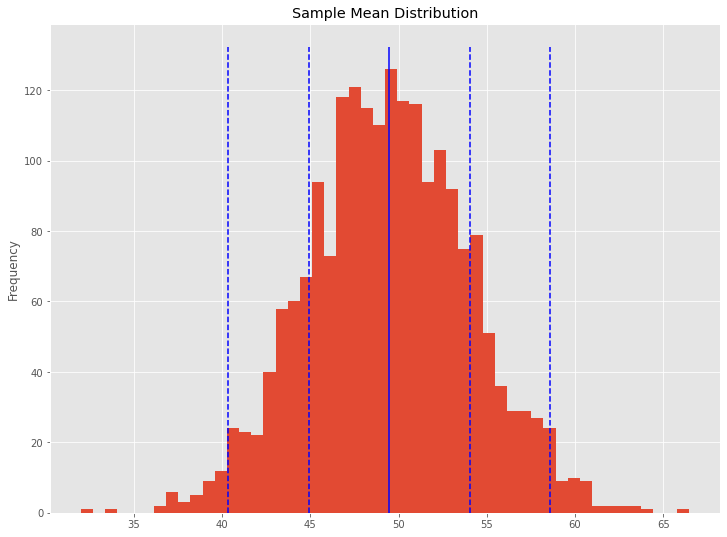

In [119]:
plt.figure(figsize = (12,9))
ax = df['sample_mean'].plot(kind = 'hist' , bins = 50)

sigma_1plus = population_mean + 1*population_std_mean
sigma_1minus = population_mean - 1*population_std_mean
sigma_2plus = population_mean + 2*population_std_mean
sigma_2minus = population_mean - 2*population_std_mean

dev = [sigma_1plus , sigma_1minus , sigma_2plus , sigma_2minus]


ymin, ymax = ax.get_ylim()

plt.vlines(x = df['sample_mean'].mean(),
          ymin = 0,
          ymax = ymax,
          colors='blue')

for line in dev:
    plt.vlines(x = line,
               ymin = 0,
               ymax = ymax,
               colors='blue',
               linestyle = '--')
    
plt.title('Sample Mean Distribution')

# 2.0 Create a function to varies DF Size
___

In [138]:
def central_limit(row , col , bins):

    np.random.seed(42)

    df = pd.DataFrame(data = np.random.randint(0,100 , size = (row,col)))
        
    # Calculate Sample Mean
    mean = df.mean(axis = 1)
    var = df.var(axis = 1)
    std = df.std(axis = 1)

    # Sample Mean for Each Row
    df['sample_mean'] = round(mean , 2)
    df['sample_var'] = round(var , 2)
    df['sample_std'] = round(std , 2)
    
    
    # Population Mean
    population_mean = df['sample_mean'].mean()
    population_var_mean = df['sample_mean'].var()
    population_std_mean = df['sample_mean'].std()
    
    display(df)
    
    # Plotting
    plt.figure(figsize = (12,9))
    ax = df['sample_mean'].plot(kind = 'hist' , bins = bins)
    
    # Defining 1 and 2 sigma range
    sigma_1plus = population_mean + 1*population_std_mean
    sigma_1minus = population_mean - 1*population_std_mean
    sigma_2plus = population_mean + 2*population_std_mean
    sigma_2minus = population_mean - 2*population_std_mean

    ymin, ymax = ax.get_ylim()

    plt.vlines(x = df['sample_mean'].mean(),
              ymin = 0,
              ymax = ymax,
              colors='blue')

    for line in dev:
        plt.vlines(x = line,
                   ymin = 0,
                   ymax = ymax,
                   colors='blue',
                   linestyle = '--')

    plt.title('Sample Mean Distribution')
    
    print('Population Mean:' , population_mean )
    print("Population Mean's Standard Deviation :" , population_std_mean )
    print("Population Mean's Variance :" , population_var_mean )

# 3.0 Visualing for Small Sample Size. Sample Size < 10
___

,0,1,2,3,4,sample_mean,sample_var,sample_std
0,51,92,14,71,60,57.6,828.3,28.78
1,20,82,86,74,74,67.2,723.2,26.89
2,87,99,23,2,21,46.4,1894.8,43.53
3,52,1,87,29,37,41.2,999.2,31.61
4,1,63,59,20,32,35.0,687.5,26.22
...,...,...,...,...,...,...,...,...
295,11,52,70,9,44,37.2,705.7,26.57
296,16,25,84,91,61,55.4,1148.3,33.89
297,45,63,1,53,64,45.2,671.2,25.91
298,50,52,35,25,28,38.0,154.5,12.43


Population Mean: 48.617999999999995
Population Mean's Standard Deviation : 13.052713143302347
Population Mean's Variance : 170.37332040133782


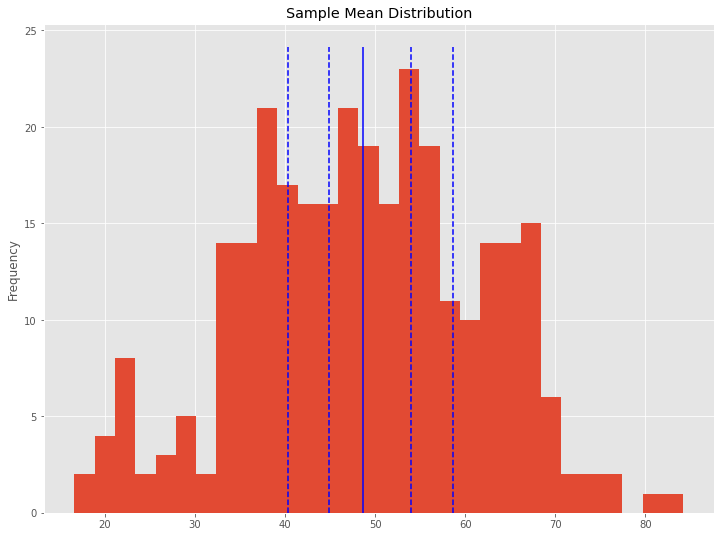

In [140]:
# Observed for smaller sample size , in this case 10, the sample mean has a large std compared to the population mean.
central_limit(300 , 5 , 30)

# 4.0 Visualing for Larger Sample Size. Sample Size >50
___

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,sample_mean,sample_var,sample_std
0,51,92,14,71,60,20,82,86,74,74,...,63,2,50,6,20,72,38,50.84,791.44,28.13
1,17,3,88,59,13,8,89,52,1,83,...,61,39,84,79,81,52,23,50.24,957.82,30.95
2,25,88,59,40,28,14,44,64,88,70,...,46,77,2,0,4,89,13,45.20,976.37,31.25
3,26,8,78,14,89,41,76,50,62,95,...,26,61,76,2,69,71,26,49.76,828.55,28.78
4,8,61,36,96,50,43,23,78,58,31,...,16,37,23,68,97,69,85,50.66,911.78,30.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,24,6,27,68,66,94,19,82,10,66,...,21,2,81,74,47,1,75,46.12,786.52,28.04
196,53,5,39,92,93,1,72,1,92,96,...,23,97,45,21,10,47,7,49.78,997.81,31.59
197,38,34,48,45,37,7,53,36,90,91,...,24,48,48,88,10,61,35,44.88,785.62,28.03
198,38,52,89,77,55,0,55,3,29,11,...,30,92,27,59,26,14,94,50.38,911.06,30.18


Population Mean: 49.294200000000004
Population Mean's Standard Deviation : 3.7274802352960394
Population Mean's Variance : 13.894108904522616


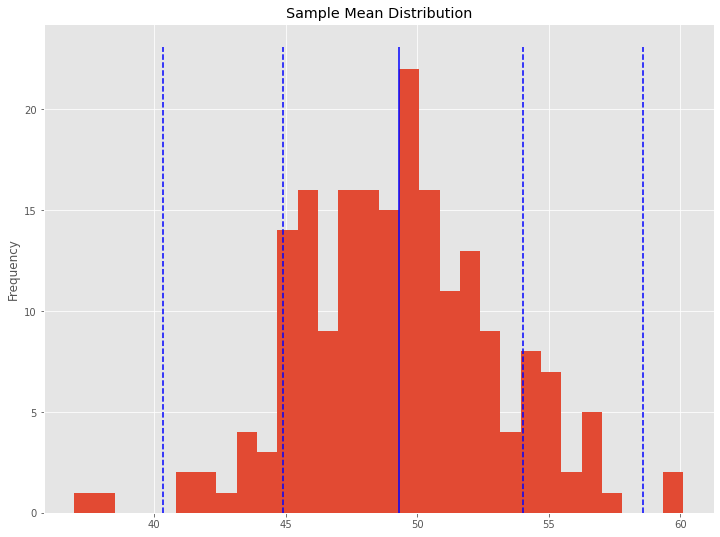

In [143]:
# Observed for larger sample size , in this case 50, the sample mean tends towards the population mean
central_limit(200 , 50 , 30)